# Домашнее задание №4. 

*Выполнила: Книс Надежда*

### Предварительная очистка данных от ненужных переменных

In [7]:
import pandas as pd
df = pd.read_csv('dataset.csv')

In [8]:
df.drop(['enrollee_id','city_development_index','enrolled_university', 
         'company_size', 'company_type', 'training_hours'], axis = 1, inplace=True)

In [9]:
df

,city,gender,relevent_experience,education_level,major_discipline,experience,last_new_job,target
0,city_103,Male,Has relevent experience,Graduate,STEM,>20,1,1.0
1,city_40,Male,No relevent experience,Graduate,STEM,15,>4,0.0
2,city_21,NaN,No relevent experience,Graduate,STEM,5,never,0.0
3,city_115,NaN,No relevent experience,Graduate,Business Degree,<1,never,1.0
4,city_162,Male,Has relevent experience,Masters,STEM,>20,4,0.0
...,...,...,...,...,...,...,...,...
19153,city_173,Male,No relevent experience,Graduate,Humanities,14,1,1.0
19154,city_103,Male,Has relevent experience,Graduate,STEM,14,4,1.0
19155,city_103,Male,Has relevent experience,Graduate,STEM,>20,4,0.0
19156,city_65,Male,Has relevent experience,High School,NaN,<1,2,0.0


## Задание 1.

**Приведите свои рассуждения о связи между зависимой переменной (target) и
предложенными социально-экономическими характеристиками из таблицы.**

**1)** target и relevant_experience: здесь может два разных случая причинно-следственной связи. Во-первых, чем больше релевантный опыт работника, тем больше у него возможностей на рынке труда устроиться на желаемую работу, тем больше вероятность, что он захочет попробовать новую работу. Во-вторых, чем больше именно релевантный опыт работника, тем, возможно, он уже больше познал различных компаний и остался в той, в которой ему хочется работать на долгое время вперед. То есть, без анализа данных тяжело говорить об однозначном направлении влияния релевантного опыта работы на желание сменить работу.  
**2)** target и educational_level: думаю, что здесь такая же ситуация, как в первом пункте. Может быть, что более высокий уровень образования дает больше "маневренности" на рынке труда (положительное влияние), а может, более высокий уровень образования каким-то образом гарантирует большую  стабильность и выдержку работника, соответственно, он дольше продержится на определенной работе и меньше шансов, что он уйдет (отрицательное влияние).   
**3)** target и last_new_job: здесь также невозможно без анализа данных сказать, каково будет направление влияния разницы в годах между текущей и предыдущей работой. Первый возможный случай - работник очень давно не менял работу, поэтому возрастает вероятность того, что он захочет ее уже поменять => положительная зависимость. Второй возможный случай - работник также давно не менял работу, что в принципе может сигнализировать о его несклонности к смене места работы => отрицательная зависимость.   
  
Зависимость переменной target от переменных city, gender, major_discipline, experience тяжело предсказать без анализа данных, так как   
**1)** мы не имеем представления об условиях конкретных городов в таблице (может какие-то города имеют более привлекательные места работы, чем другие, что будет уменьшать желание в таких городах сменить работу, и увеличивать это желание в городах с менее привлекательными рабочими местами)  
**2)** про зависимость такого желания от пола тоже сложно сказать, неясно, кто больше склонен к смене работе
**3)** зависимость желания сменить работу зависит от основной дисциплины в университете в той степени, насколько в разных сферах и индустриях в принципе выше текучка кадров, а этого мы не знаем  
**4)** про зависимость таргета от опыта так же тяжело сказать, ведь этот опыт может включать в себя как релевантный, так и нерелевантный, в частности про релевантный опыт работы я сказала выше 

## Задание 2.

**Уберите все пропуски в данных. Запишите команду.
Все дальнейшие действия произведите на выборке, очищенной от пропущенных
значений.
Сколько наблюдений осталось в выборке?**

In [10]:
df.dropna(inplace=True)

In [11]:
df

,city,gender,relevent_experience,education_level,major_discipline,experience,last_new_job,target
0,city_103,Male,Has relevent experience,Graduate,STEM,>20,1,1.0
1,city_40,Male,No relevent experience,Graduate,STEM,15,>4,0.0
4,city_162,Male,Has relevent experience,Masters,STEM,>20,4,0.0
7,city_46,Male,Has relevent experience,Graduate,STEM,13,>4,1.0
8,city_103,Male,Has relevent experience,Graduate,STEM,7,1,1.0
...,...,...,...,...,...,...,...,...
19150,city_160,Female,Has relevent experience,Graduate,STEM,10,3,0.0
19152,city_103,Female,Has relevent experience,Graduate,Humanities,7,1,0.0
19153,city_173,Male,No relevent experience,Graduate,Humanities,14,1,1.0
19154,city_103,Male,Has relevent experience,Graduate,STEM,14,4,1.0


In [13]:
df.shape[0]

12606

Значит, в выборке осталось 12606 наблюдений.

## Задание 3.

**Какая доля выборки имеет релевантный опыт работы?**

In [16]:
a = df[df['relevent_experience']=='Has relevent experience'].shape[0]
b = df.shape[0]
print(a/b*100)

79.97778835475171


Значит, почти 80% работников имеет релевантный опыт работы.

## Задание 4.

**Учитывая тип переменной релевантного опыта работы, уточните чему равна 70-
квантиль релевантного опыта работы? Проинтерпретируйте результат, если нет
противоречий.**

In [24]:
df.dtypes

city                    object
gender                  object
relevent_experience     object
education_level         object
major_discipline        object
experience              object
last_new_job            object
target                 float64
dtype: object

Мы видим, что переменная релевантного опыта работы имеет тип object, 
нам нужно перевести его в числовой тип для расчета квантиля. 

In [32]:
from sklearn import preprocessing
import numpy as np

le = preprocessing.LabelEncoder()
c = np.ones(len(df))                                            #заполняем столбец "с" полностью единичками
df['rel_num'] = c - le.fit_transform(df['relevent_experience']) #вычитаем из него наш столбец с переменной
d = df['rel_num'].sort_values()                                 #сортируем полученные значения для расчета квантиля
np.percentile(d,70)                                             #рассчитываем квантиль уровня 70

1.0

При переводе из object в числовую переменную мы столкнулись с тем, что под значением "1" у нас теперь лежит "No relevent experience", что немного противоречит логике бинарных переменных, поэтому я и сделала шаг с вычитанием этого столбца из "единичного" столбца, чтобы буквально "перевернуть" значения этой бинарной переменной.

Полученный результат можно интерпретировать так: с вероятностью 70% значения случайной величины, отвечающей за наличие релевантного опыта у кандидата, не превышают значение "1" или "наличие релевантного опыта".  
Однако ясно, что у нас в 100% случаев значения этой переменной не превышают 1.  
В нашем случае, переменная релевантного опыта является по своей сути категориальной переменной, принимающей одно из двух значений, а для категориальных переменных интерпретация квантилей не имеет смысла.

## Задание 5.

**Преобразуйте текстовые переменные в числовые и создайте для них новые колонки в
используемом датафрейме. Запишите команду.**

Из задания 4 стало ясно, что все переменные кроме целевой (target) являются текстовыми (object), значит всех их нужно перевести в числовые переменные. Снова воспользуемся LabelEncoder()

In [33]:
df['city_num'] = le.fit_transform(df['city'])
df['gender_num'] = le.fit_transform(df['gender'])
df['educ_num'] = le.fit_transform(df['education_level'])
df['major_num'] = le.fit_transform(df['major_discipline'])
df['exp_num'] = le.fit_transform(df['experience'])
df['last_num'] = le.fit_transform(df['last_new_job'])

## Задание 6.

**Разделите выборку на две подвыборки. 60% выборки оставьте для обучения, а 40% -
для тестирования модели. Запишите команду. Сколько наблюдений попало в выборку для обучения, сколько в выборку для
тестирования? (Примечание: чтобы выборка всегда разбивалась одинаково,
зафиксируйте аргумент random_state=42)**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
y = df['target']
x = df[['rel_num', 'city_num', 'gender_num', 'educ_num', 'major_num', 'exp_num', 'last_num']]
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=42)

In [36]:
print(f'В выборку для обучения попало {len(X_train)} наблюдений, а в выборку для тестирования - {len(X_test)}')

В выборку для обучения попало 7563 наблюдений, а в выборку для тестирования - 5043


## Задание 7.

**В чем заключается суть стандартизации переменных? Зачем она требуется при работе
с методом к-ближайших соседей? Потребуется ли эта процедура для работы с
текущим датафреймом? Если да, то произведите стандартизацию данных и запишите
команду.**

Суть стандартизации переменных заключается в том, чтобы привести данные к нормальному распределению, где дисперсия равна 1, а среднее значение нулю. Данный метод обработки данных необходим в ситуациях, когда переменные имеют существенно разные единицы измерения, что делает результаты построения статистических моделей менее точными. Например, в нашей таблице переменная rel_num принимает значения 0 или 1, в то время как переменная city_num может достигать значения от 20 до 162, что делает тяжело сопоставимыми данные переменные в процессе анализа и соответствующего построения модели.  
Метод к-ближайших соседей особенно чувствителен к такому различию в размерности данных, так как это приведет к неправильному расчету расстояния до ближайшего соседа, и наша классификация будет неверна.  
Значит, в связи с такой несоразмерностью наших данных, нам также необходимо провести стандартизацию.

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                  #вычисляет ср. значение и стандарт. отклонение от тренировочной выборки, 
                                     #которые будут использоваться для последующего масштабирования
X_train = scaler.transform(X_train)  #выполняет стандартизацию тренировочной выборки путем центрирования и масштабирования
X_test = scaler.transform(X_test)    #выполняет стандартизацию тестовой выборки путем центрирования и масштабирования

## Задание 8.

**Для решения задачи классификации используйте метод к-ближайших соседей.
Установите первоначальное значение соседей равное 3 (k=3). Постройте
предсказание о том, что респондент будет искать новую работу, используя весь набор
социально-экономических характеристик из таблицы. Запишите команду.**

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)          #отдаем на запоминание модели нашу тренировочную выборку
y_pred_knn = classifier.predict(X_test)   #просим модель предсказать значения таргета с использованием нашей тестовой выборки
y_pred_knn                                #просим показать предсказанные моделью значения

array([0., 0., 0., ..., 0., 0., 0.])

## Задание 9.

**Рассчитайте error rate. Запишите расчетную формулу и полученные значение.
Почему не стоит полагаться на этот параметр при оценке качества сделанного
прогноза?**

**Формула: error rate = 1 - accuracy**

In [51]:
from sklearn.metrics import accuracy_score

round(1 - accuracy_score(y_test, y_pred_knn),4) #считаем accuracy score по нашим тестовому и предсказанному таргетам
                                                #вычитаем его из единицы и округляем

0.2536

Модель неверно предсказывает в 25.36% случаев.

Однако помимо accuracy, существуют также такие метрики точности модели как precision и recall.
- Accuracy показывает, насколько точна модель в целом по всем классам
- Precision показывает точность при прогнозировании целевого класса 
- Recall показывает, может ли наша модель найти все объекты нужного нам (целевого) класса


Тогда использование accuracy как метрики качества модели будет нецелесообразным в следующих случаях:
- если нам необходимо понять насколько модель верна именно при прогнозировании целевого класса
- если мы хотим узнать, возможно ли то, что наша модель сможет найти все объекты целевого класса
- если мы имеем дело с несбалансированными классами (в одном классе 90% наблюдений, а в другом - 10%)

## Задание 10.

**Постройте матрицу ошибок для сделанного прогноза. Какое количество ложно
положительных (false positive) и ложно отрицательных (false negative) результатов дал
ваш прогноз?**

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from statsmodels.compat import lzip

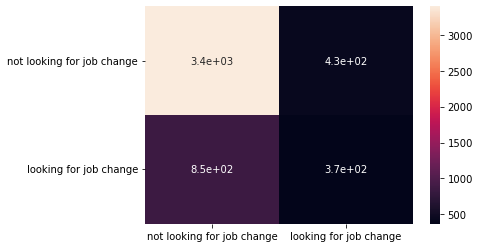

In [55]:
#задаем имена классов
classes_names = ['not looking for job change', 'looking for job change'] 

#создаем датафрейм для матрицы ошибок с колонками по названиям классов
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_knn), columns=classes_names, index = classes_names) 

#строим тепловую карту (хитмэп) на основе созданного датафрейма с матрицей ошибок
#при этом сами значения ячеек будут отображаться на карте (annot=True)
sns.heatmap(cm, annot=True) 

#превратим нашу матрицу-датафрейм в словарь со значениями с помощью .ravel() 
conf= confusion_matrix(y_test, y_pred_knn).ravel() 

#напишем, на каких именно местах должны находиться ячейки из хитмепа
names = ['true_neg', 'false_pos',  
        'false_neg', 'true_pos']   

#применим lzip для вывода количества ложноположительных и ложноотрицательных результатов
matrix = lzip(names,conf)               

In [56]:
print(f" Количество ложноположительных результатов равняется {matrix[2][1]}, а количество ложноотрицательных - {matrix[1][1]}")

 Количество ложноположительных результатов равняется 850, а количество ложноотрицательных - 429


## Задание 11.

**Оцените точность (accuracy), точность (precision) и полноту (recall) сделанного
прогноза двумя способами:
•
Посчитайте значение каждого показателя вручную. Выпишите формулу с
полученными значениями из матрицы ошибок.
•
Вызовите метод для расчета парметров качества прогноза. Выпишите команды.
Совпали ли значения, полученные двумя способами?**

### Подсчет вручную:

$$ Accuracy=\frac{TP+TN}{TP+FP+FN+TN}  $$
$$ Precision=\frac{TP}{TP+FP} $$
$$ Recall=\frac{TP}{TP+FN} $$

In [59]:
accuracy_formula= round((matrix[0][1] + matrix[3][1])/(matrix[0][1] + matrix[1][1] + matrix[2][1] + matrix[3][1]),3)
precision_formula = round((matrix[3][1])/(matrix[1][1] + matrix[3][1]),3)
recall_formula = round((matrix[3][1])/(matrix[2][1] + matrix[3][1]),3)

### Подсчет с помощью метода Python:

In [61]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred_knn, output_dict=True)

In [64]:
accuracy_auto = round(report['accuracy'],3)
precision_auto = round(report['1.0']['precision'],3)
recall_auto = round(report['1.0']['recall'],3) 

### Сравнение результатов:

In [65]:
print(f'By formula: accuracy = {accuracy_formula}, precision = {precision_formula}, recall = {recall_formula}')
print(f'Automatically: accuracy = {accuracy_auto}, precision = {precision_auto}, recall = {recall_auto}')

By formula: accuracy = 0.746, precision = 0.462, recall = 0.303
Automatically: accuracy = 0.746, precision = 0.462, recall = 0.303


Значит, показатели accuracy, precision, recall, полученные двумя разными способами, в нашей модели совпадают.

## Задание 12.

**В чем заключаются недостатки метода k-ближайших соседей? К чему приводит
слишком большое и слишком малое количество соседей?**

Недостатки метода k-ближайших соседей:  
- Метод работает существенно медленнее при увеличении объема выборки или независимых переменных  
- Отстутствие однозначности в определении оптимального параметра k (сколько именно соседей стоит рассмотреть)
- Чувствительность модели к несоразмерности данных (как в нашем примере), что обязывает нас проводить стандартизацию
- Метод чувствителен также к выбросам в выборке

- Слишком большое количество соседей приведет к переобучению нашей модели на тренировочном множестве, а значит к неточным и некорректным результатам на тестовом множестве  
  
- Выбор слишком малого количества соседей обуславливает недообучение модели, так как выбирается слишком малый ориентир для работы модели уже на тестовой выборке